**Code reviewer**

¡Hola en esta nueva aventura!

Mi nombre es **Ivan Hernandez** y seré tu revisor de código para este proyecto.

Revisaré todo el cuaderno con preguntas o comentarios dejados atrás. Te animo a responder los comentarios con cualquier duda o solución a la recomendación o problema presentado **(con la celda en color azul)**, esa es la mejor manera de entender y aprender en este nuevo mundo de datos y programación. Seguiré la misma lista de verificación y los mismos pasos en los criterios de evaluación del proyecto.

 Importante, <span style="color:red">por favor no cambies mis comentarios</span>, es una buena forma de seguir tu aprendizaje por mí y otros revisores de código y finalmente, pongo un ejemplo del color del código y su significado.

<div class="alert alert-success">
<h1> Comentarios del revisor </h1>
Excelente trabajo y ejecución
</div>

<div class="alert alert-warning">
<h1> Comentarios del revisor </h1>
Comentario no crítico; si hay menos de tres de tales comentarios, el proyecto puede aceptarse sin su refinamiento.</div>

<div class="alert alert-danger">
<h1> Comentarios del revisor </h1>
Error que debe corregirse, de lo contrario el proyecto no será aceptado.
</div>

<div class="alert alert-info">
<h1> Comentarios del estudiante</h1>
Comentario de ejemplo
</div>

# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

En este analisis el proposito principal es ver el tipo de relaciones que tienen los factores de cada vehiculo para saber cuales son aquellos que tengan mas probabilidades a tener exito a la hora de venderse.

## Inicialización

Vamos a empezar cargando las librerias que puedan ayudar con este analisis.

In [1]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

### Cargar datos

Guardo los datos en el dataframe "data".

In [2]:
# Carga el archivo de datos en un DataFrame
data = pd.read_csv('/datasets/vehicles_us.csv')


### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

Vamos a explorar los datos generales del dataset, para ver si hay alguna anomalia y estar informados.

In [3]:
# imprime la información general/resumida sobre el DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# imprimir una muestra de datos
data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


Se puede ver que hay ciertos valores ausentes en algunas filas, y que en el caso de "is_4wd" lo mas probable es que esos valores ausentes se deban a que esta en booleano.

In [5]:
data.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Vamos a proceder a ver los tipos de datos del dataframe.

In [6]:
data.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

Ya visto los tipos de datos, vamos a ver la proporcion de valores ausentes en relacion al dataframe.

In [7]:
print((len(data[data['model_year'].isna()]) / len(data)) * 100)
print((len(data[data['paint_color'].isna()]) / len(data)) * 100)
print((len(data[data['odometer'].isna()]) / len(data)) * 100)
print((len(data[data['cylinders'].isna()]) / len(data)) * 100)

7.023774866569626
17.985443959243085
15.316836487142163
10.208636584182436


### Conclusiones y siguientes pasos

Se puede ver que antes de seguir con un analisis, se debe imputar o tomar decisiones sobre los valores ausentes. En el caso de "paint_color" es dificil imputar, pues es una variable que no depende o tiene relacion con alguna otra.

Vamos a ver la cantidad de valores ausentes que hay y sus combinaciones. Con esto podremos ver cuales tienen prioridad en solucion y si en realidad afecta en gran escala el analisis.

In [8]:
print(len(data[(data['model_year'].isna()) & (data['paint_color'].isna()) & (data['odometer'].isna()) & (data['cylinders'].isna())]))
print(len(data[(data['model_year'].isna()) & (data['paint_color'].isna()) & (data['odometer'].isna())]))
print(len(data[(data['model_year'].isna()) & (data['paint_color'].isna()) & (data['cylinders'].isna())]))
print(len(data[(data['model_year'].isna()) & (data['cylinders'].isna()) & (data['odometer'].isna())]))
print(len(data[(data['cylinders'].isna()) & (data['paint_color'].isna()) & (data['odometer'].isna())]))
print(len(data[(data['model_year'].isna()) & (data['paint_color'].isna())]))
print(len(data[(data['model_year'].isna()) & (data['odometer'].isna())]))
print(len(data[(data['model_year'].isna()) & (data['cylinders'].isna())]))
print(len(data[(data['paint_color'].isna()) & (data['cylinders'].isna())]))
print(len(data[(data['paint_color'].isna()) & (data['odometer'].isna())]))
print(len(data[(data['odometer'].isna()) & (data['cylinders'].isna())]))
print(len(data[(data['model_year'].isna())]))
print(len(data[(data['cylinders'].isna())]))
print(len(data[(data['odometer'].isna())]))
print(len(data[(data['paint_color'].isna())]))

9
97
51
59
154
652
549
363
950
1455
812
3619
5260
7892
9267


<div class="alert alert-success">
<h1> Comentarios del revisor </h1>
Muy buen trabajo revisando los datos
</div>

## Tratar los valores ausentes (si hay)

Vamos a comenzar eliminando la columna "model_year", pues su cantidad de valores ausentes no es muy relevante para el dataframe e imputarla seria complicado. Despues, sacaremos la mediana de odometer, ya que puede que hayan valores de millaje muy altos y puedan distorsionar al imputar. Vamos a imputar el odometer dependiendo de la condicion del carro, ya que es con una de las variables que tiene mas relacion.

Luego haremos lo mismo con los cilindros, imputaremos a partir del modelo, pues los modelos son el mejor indicatorio para saber su cantidad de cilindros. Luego procederemos con cambiar los valores de "is_4wd" que sean "NaN" a 0, pues esto eliminaria los valores ausentes en la columna y daria paso a un mejor analisis. Para finalizar haremos un reset al index del dataset, para tener un resultado mas limpio.

In [9]:
data[data['cylinders'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,NaN,NaN,2018-07-02,25
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,NaN,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,NaN,2018-06-22,28


In [10]:
data[data['model_year'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


In [11]:
median_odometer_by_condition = data.groupby(['condition'])['odometer'].median()
median_cylinders_by_model = data.groupby(['model'])['cylinders'].median()
median_model_year_by_model = data.groupby(['model'])['model_year'].median()

def median_model_year(row):
    row_model = row['model']
    row_model_year = row['model_year']
    
    if pd.isna(row_model_year):
        return median_model_year_by_model[row_model]
    else:
        return row_model_year

def median_odometer(row):
    row_odometer = row['odometer']
    row_condition = row['condition']
    
    if pd.isna(row_odometer):
        return median_odometer_by_condition[row_condition]
    else:
        return row_odometer

def median_cylinders(row):
    row_model = row['model']
    row_cylinders = row['cylinders']
    if pd.isna(row_cylinders):
        return median_cylinders_by_model[row_model]
    else:
        return row_cylinders
    
print(median_model_year(data.loc[1]))
print(median_odometer(data.loc[3]))    
print(median_cylinders(data.loc[9]))

data['model_year'] = data.apply(median_model_year, axis=1)
data['odometer'] = data.apply(median_odometer, axis=1)
data['cylinders'] = data.apply(median_cylinders, axis=1)

data['is_4wd'] = data['is_4wd'].fillna(0)
data['is_4wd'] = data['is_4wd'].astype('int64')

data = data.reset_index()

print(len(data[data['odometer'].isna()]))
print(len(data[data['cylinders'].isna()]))
print(len(data[data['is_4wd'].isna()]))
print(len(data[data['model_year'].isna()]))

2011.0
181613.0
6.0
0
0
0
0


<div class="alert alert-danger">
<h1> Comentarios del revisor </h1>

Muy buen trabajo, lo único es que podrías inferir el año del modelo según el modelo, algo similar a lo que hiciste con `cylinders` pero ahora aplicado a `model_year` y con ello sencillamente puedes hallar los valores nulos.

</div>

<div class="alert alert-info">
<h1> Comentarios del estudiante</h1>
Listo! No lo habia hecho porque la cantidad de datos ausentes en model_year era muy poca (inferior al diez porciento), por lo que no afectaba tanto.
</div>

<div class="alert alert-success">
<h1> Comentarios del revisor V2</h1>

Si existe la posibilidad de tratar los datos y hay una correlación clara, es mejor hacerlo que eliminarlos. Que eliminarlos sea la última posibilidad siempre.
</div>

## Corregir los tipos de datos

Los datos que necesitan corregirse serian el formato de la columna "date_posted", ya que no esta en formato de date_time, los cilindros se pueden cabiar a tipo integral, ya que al estar en decimales puede que interfiera con el analisis. Y para finalizar, el año del modelo se puede cambiar a tipo integral, ya que no deberian haber decimales en este.

In [12]:
data['date_posted'] = pd.to_datetime(data['date_posted'], format= '%Y-%m-%d')
data['cylinders'] = data['cylinders'].astype('int64')
data['model_year'] = data['model_year'].astype('int64')

## Enriquecer datos

Vamos a agregar diferentes factores que nos ayuden en el analisis, como es el año del vehículo en cuestión cuando el anuncio se publicó, el millaje promedio del vehículo dependiendo del modelo y el año del modelo, y cambiar la condición a algo mas manipulable, como son los números.

condition['5'] = nuevo

condition['4'] = como nuevo

condition['3'] = excelente

condition['2'] = buen estado

condition['1'] = bastante

condition['0'] = necesita arreglo

In [13]:
# Agrega valores de fecha y hora para cuando se colocó el anuncio



In [14]:
# Agrega los años del vehículo cuando el anuncio se colocó
data['car_years'] = data['date_posted'].dt.strftime('%Y')
data['car_years'] = ((data['car_years'].astype('int64')) - (data['model_year']))
data

,index,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,car_years
0,0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,NaN,1,2018-06-23,19,7
1,1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,7
2,2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,6
3,3,1500,2003,ford f-150,fair,8,gas,181613.0,automatic,pickup,NaN,0,2019-03-22,9,16
4,4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,5
51521,51521,2700,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,0,2018-11-14,22,16
51522,51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,9
51523,51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,5


In [15]:
# Agrega el millaje promedio del vehículo por año
mean_odometer_by_model_and_modelyear = data.groupby(['model_year', 'model'])['odometer'].mean().reset_index()
def avg_odometer(row):
    model_year = row['model_year']
    model = row['model']
    valor = mean_odometer_by_model_and_modelyear.query('model_year == @model_year and model == @model')['odometer'].iloc[0]
    return valor

data['avg_odometer_by_year'] = data.apply(avg_odometer, axis=1)
data

,index,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,car_years,avg_odometer_by_year
0,0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,NaN,1,2018-06-23,19,7,107417.074074
1,1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,7,127244.763923
2,2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,6,109886.372549
3,3,1500,2003,ford f-150,fair,8,gas,181613.0,automatic,pickup,NaN,0,2019-03-22,9,16,171436.571429
4,4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2,86734.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,5,97566.904762
51521,51521,2700,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,0,2018-11-14,22,16,153778.264706
51522,51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,9,116863.423077
51523,51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,5,97347.219512


<div class="alert alert-warning">
<h1> Comentarios del revisor </h1>

Está excelente, podrías usar `.loc[]` en `mean_odometer_by_model_and_modelyear` sin reiniciar el indice y quedaría más corta la linea. Pero llegas al mismo resultado es solo una cuestión de optimización y menos pasos para acceder al valor.
</div> 

In [16]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente
data['condition'] = data['condition'].replace('new', 5)
data['condition'] = data['condition'].replace('like new', 4)
data['condition'] = data['condition'].replace('excellent', 3)
data['condition'] = data['condition'].replace('good', 2)
data['condition'] = data['condition'].replace('fair', 1)
data['condition'] = data['condition'].replace('salvage', 0)
data['condition'].unique()

array([2, 4, 1, 3, 0, 5])

## Comprobar datos limpios

Vamos a comprobar la cantidad de datos que tenemos ahora e imprimir una muestra de ellos.

In [17]:
# imprime la información general/resumida sobre el DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 51525 non-null  int64         
 1   price                 51525 non-null  int64         
 2   model_year            51525 non-null  int64         
 3   model                 51525 non-null  object        
 4   condition             51525 non-null  int64         
 5   cylinders             51525 non-null  int64         
 6   fuel                  51525 non-null  object        
 7   odometer              51525 non-null  float64       
 8   transmission          51525 non-null  object        
 9   type                  51525 non-null  object        
 10  paint_color           42258 non-null  object        
 11  is_4wd                51525 non-null  int64         
 12  date_posted           51525 non-null  datetime64[ns]
 13  days_listed     

In [18]:
# imprimir una muestra de datos
data


,index,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,car_years,avg_odometer_by_year
0,0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,NaN,1,2018-06-23,19,7,107417.074074
1,1,25500,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,7,127244.763923
2,2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,6,109886.372549
3,3,1500,2003,ford f-150,1,8,gas,181613.0,automatic,pickup,NaN,0,2019-03-22,9,16,171436.571429
4,4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2,86734.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,51520,9249,2013,nissan maxima,4,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,5,97566.904762
51521,51521,2700,2002,honda civic,0,4,gas,181500.0,automatic,sedan,white,0,2018-11-14,22,16,153778.264706
51522,51522,3950,2009,hyundai sonata,3,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,9,116863.423077
51523,51523,7455,2013,toyota corolla,2,4,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,5,97347.219512


## Estudiar parámetros principales

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

Para tener una mejor idea de nuestros datos vamos a hacer graficos de los parametros principales de nuestro analisis.

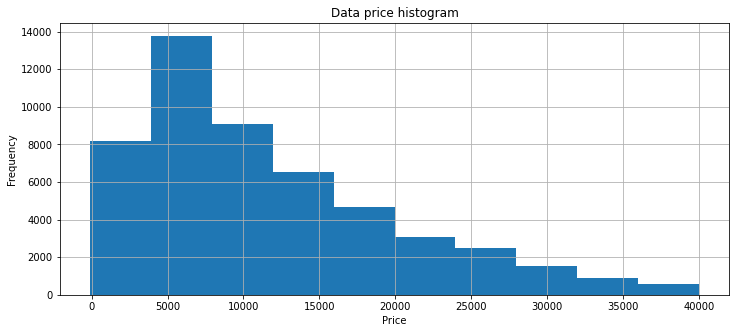

In [19]:
#
data['price'].hist(bins=10, range = (-100, 40000), figsize = (12, 5))
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Data price histogram')
plt.show()

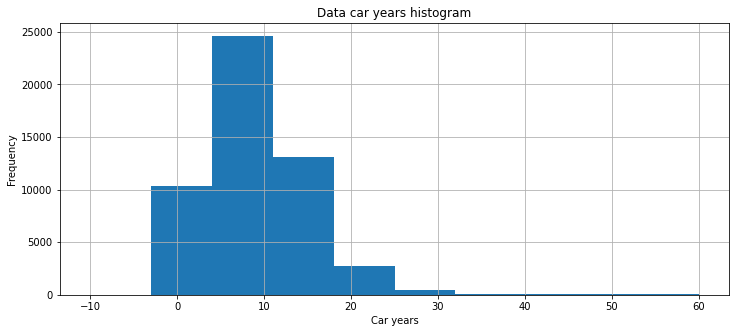

In [20]:
#
data['car_years'].hist(bins=10, range= (-10, 60), figsize = (12, 5))
plt.xlabel('Car years')
plt.ylabel('Frequency')
plt.title('Data car years histogram')
plt.show()

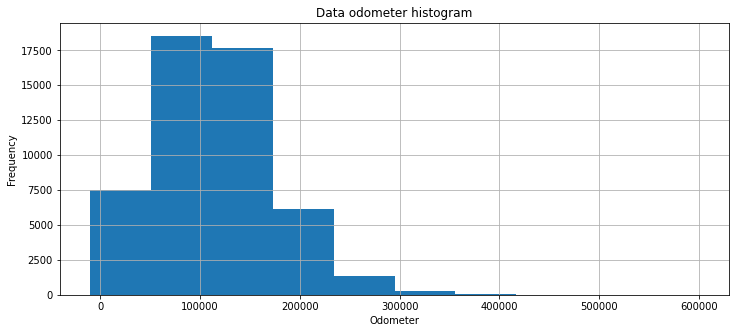

In [21]:
#
data['odometer'].hist(bins=10, range= (-10000, 600000), figsize = (12, 5))
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.title('Data odometer histogram')
plt.show()

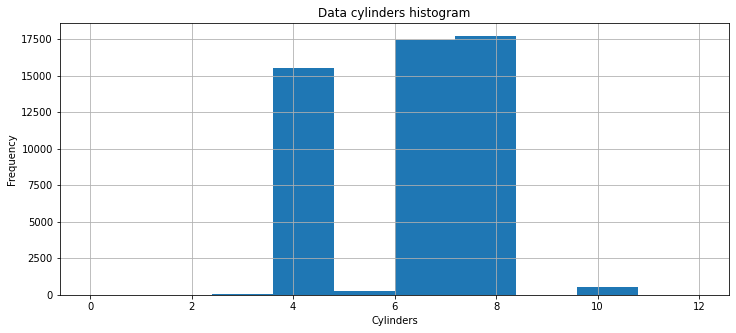

In [22]:
#
data['cylinders'].hist(bins=10, range= (0, 12), figsize = (12, 5))
plt.xlabel('Cylinders')
plt.ylabel('Frequency')
plt.title('Data cylinders histogram')
plt.show()

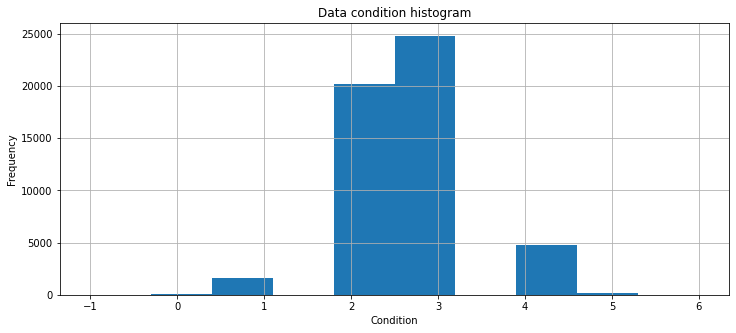

In [23]:
#
data['condition'].hist(bins=10, range= (-1, 6), figsize = (12, 5))
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.title('Data condition histogram')
plt.show()

<div class="alert alert-success">
<h1> Comentarios del revisor </h1>

Muy buen trabajo!
</div> 

## Estudiar y tratar valores atípicos

Dado a que algunos de nuestros parametros tienen valores atipicos, vamos a hacer un nuevo dataframe apartando estos datos para que no haya un sesgo equivocado de nuestro analisis. Para definir estos, vamos a utilizar los rangos quartiles. En los casos de "price" y "odometer" no es una probabilidad que el precio sea <= 1, o que el odometer sea <= 1, ya que significaria que son autos que son de una agencia de carros.

In [24]:
# Determina los límites inferiores para valores atípicos
price_1 = data['price'].describe()
odometer_1 = data['odometer'].describe()
days_listed_1 = data['days_listed'].describe()

iqr_price = price_1['75%'] - price_1['25%']
iqr_odometer = odometer_1['75%'] - odometer_1['25%']
iqr_days_listed = days_listed_1['75%'] - days_listed_1['25%']

price_2 = price_1['25%'] - (1.5*iqr_price)
odometer_2 = odometer_1['25%'] - (1.5*iqr_odometer)
days_listed_2 = days_listed_1['25%'] - (1.5*iqr_days_listed)

In [25]:
# Determinar los límites superiores para valores atípicos
price_3 = price_1['75%'] + (1.5*iqr_price)
odometer_3 = odometer_1['75%'] + (1.5*iqr_odometer)
days_listed_3 = days_listed_1['75%'] + (1.5*iqr_days_listed)

In [26]:
# Almacena los datos sin valores atípicos en un DataFrame separado
good_price_data = data.query('@price_2 < price < @price_3')
good_odometer_data = data.query('@odometer_2 < odometer < @odometer_3')
good_days_listed_data = data.query('@days_listed_2 < days_listed < @days_listed_3')

print(len(data))
print(len(good_price_data))
print(len(good_odometer_data))
print(len(good_days_listed_data))
data_filtered = data.query('1 < price <= @price_3 and 1 < odometer <= @odometer_3 and days_listed <= @days_listed_3')
print(len(data_filtered))

51525
49879
50602
49824
46453


<div class="alert alert-success">
<h1> Comentarios del revisor </h1>

Muy buen trabajo con los valores atípicos.
</div> 

## Estudiar parámetros principales sin valores atípicos

Vamos a crear nuevos graficos de los datos filtrados e imprimirlos, alado de estos vamos a imprimir los anteriores graficos con los datos originales.

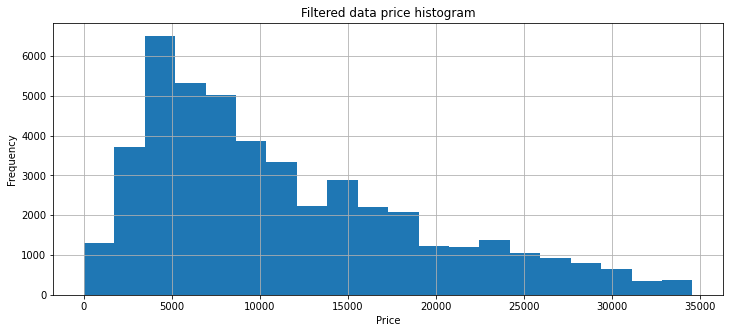

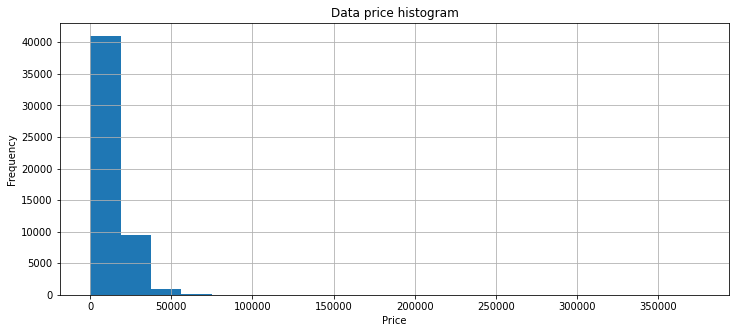

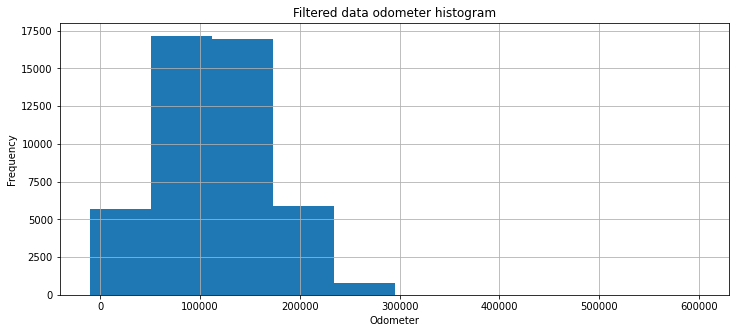

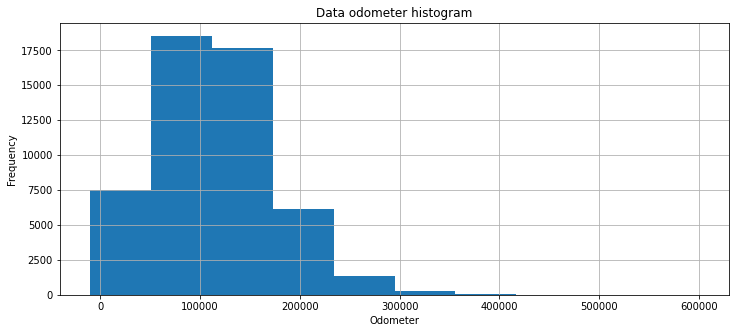

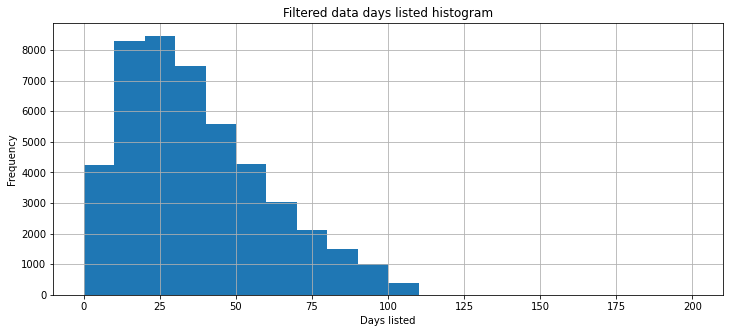

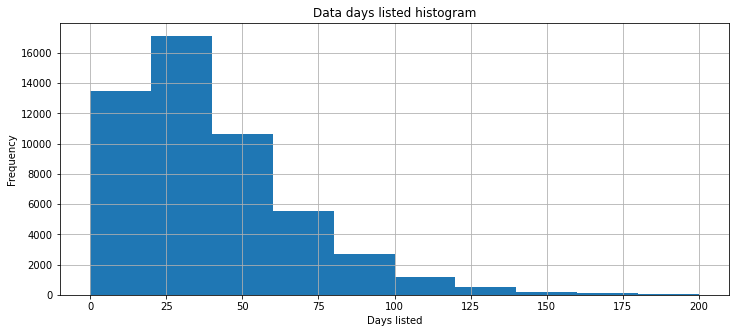

In [27]:
data_filtered['price'].hist(bins= 20, figsize= (12, 5))
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Filtered data price histogram')
plt.show()
data['price'].hist(bins= 20, figsize= (12, 5))
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Data price histogram')
plt.show()
data_filtered['odometer'].hist(bins=10, range= (-10000, 600000), figsize = (12, 5))
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.title('Filtered data odometer histogram')
plt.show()
data['odometer'].hist(bins=10, range= (-10000, 600000), figsize = (12, 5))
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.title('Data odometer histogram')
plt.show()
data_filtered['days_listed'].hist(bins= 20, range= (0, 200), figsize= (12, 5))
plt.xlabel('Days listed')
plt.ylabel('Frequency')
plt.title('Filtered data days listed histogram')
plt.show()
data['days_listed'].hist(bins=10, range= (0, 200), figsize = (12, 5))
plt.xlabel('Days listed')
plt.ylabel('Frequency')
plt.title('Data days listed histogram')
plt.show()

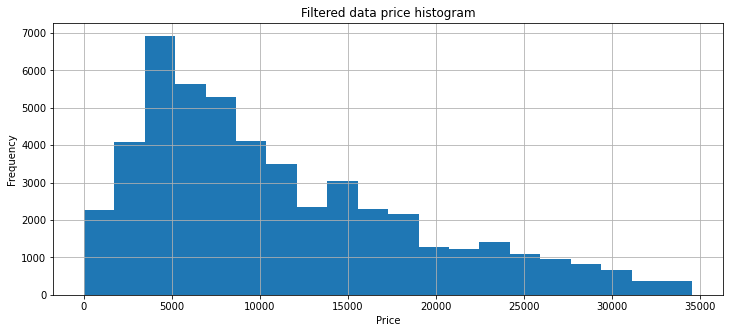

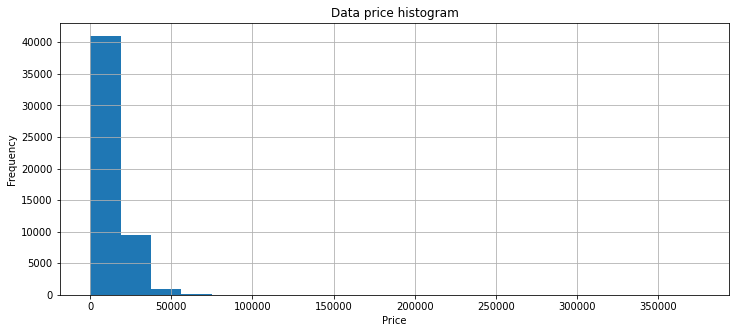

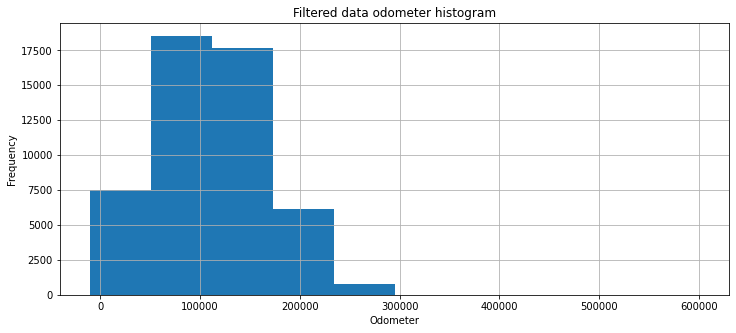

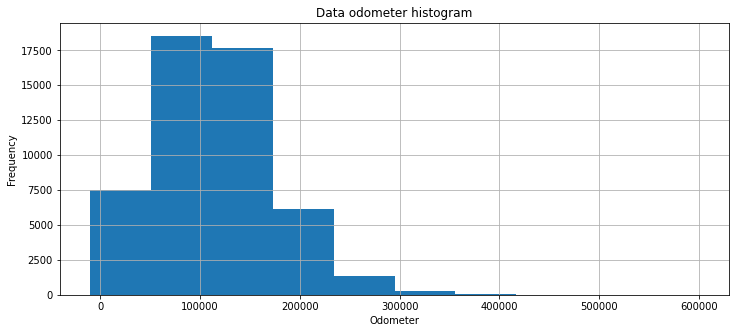

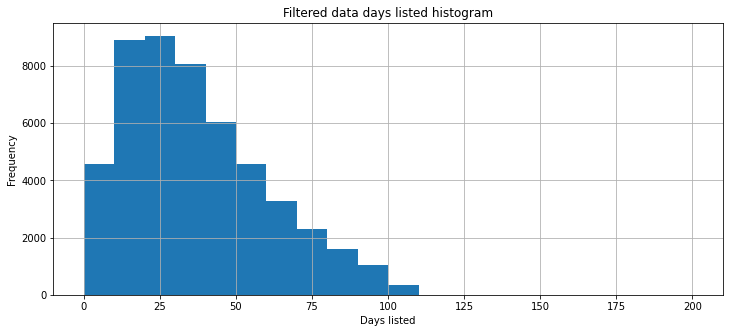

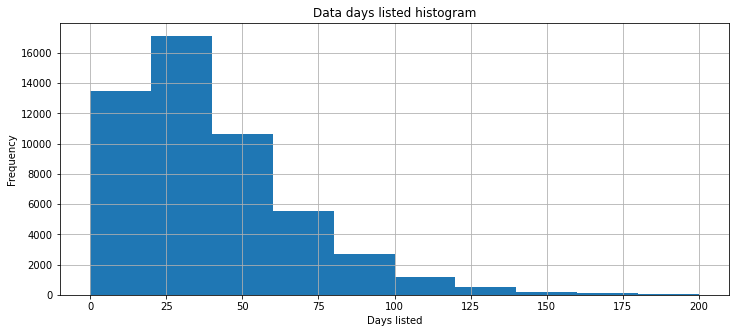

In [28]:
good_price_data['price'].hist(bins= 20, figsize= (12, 5))
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Filtered data price histogram')
plt.show()
data['price'].hist(bins= 20, figsize= (12, 5))
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Data price histogram')
plt.show()
good_odometer_data['odometer'].hist(bins=10, range= (-10000, 600000), figsize = (12, 5))
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.title('Filtered data odometer histogram')
plt.show()
data['odometer'].hist(bins=10, range= (-10000, 600000), figsize = (12, 5))
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.title('Data odometer histogram')
plt.show()
good_days_listed_data['days_listed'].hist(bins= 20, range= (0, 200), figsize= (12, 5))
plt.xlabel('Days listed')
plt.ylabel('Frequency')
plt.title('Filtered data days listed histogram')
plt.show()
data['days_listed'].hist(bins=10, range= (0, 200), figsize = (12, 5))
plt.xlabel('Days listed')
plt.ylabel('Frequency')
plt.title('Data days listed histogram')
plt.show()

## Periodo de colocación de los anuncios

Vamos a hacer un diagrama de caja para poder ver los valores atipicos que hay en "day_listed", y poder definir los quartiles. Luego usaremos .describe() para poder ver la mediana y media de los dias de los anuncios. A partir de los cuartiles podremos ver cuales son los anuncios que demoraron menos en ser eliminados y los anuncios que demoraron mas en ser eliminados (los mas largos).

La mediana de "days_filtered" es 32.0
La media de "days_filtered" es 36.681506038361356"
count    46453.000000
mean        36.681506
std         23.194931
min          0.000000
25%         18.000000
50%         32.000000
75%         51.000000
max        104.000000
Name: days_listed, dtype: float64


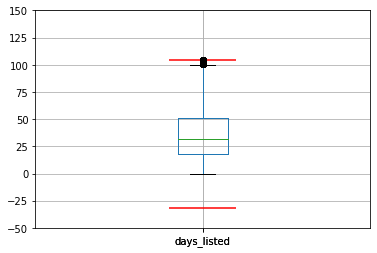

In [29]:
plt.ylim(-50, 150)
data_filtered.boxplot('days_listed')
plt.hlines(y=[days_listed_2], xmin= 0.9, xmax= 1.1, color='red')
data_filtered.boxplot('days_listed')
plt.hlines(y=[days_listed_3], xmin= 0.9, xmax= 1.1, color='red')
days_listed_median = data_filtered['days_listed'].describe()['50%']
days_listed_mean = data_filtered['days_listed'].describe()['mean']
print(f'La mediana de "days_filtered" es {days_listed_median}')
print(f'La media de "days_filtered" es {days_listed_mean}"')
print(data_filtered['days_listed'].describe())

In [30]:
data_filtered.columns

Index(['index', 'price', 'model_year', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed', 'car_years', 'avg_odometer_by_year'],
      dtype='object')

In [31]:
print(data_filtered.query('days_listed > 51')['transmission'].value_counts(normalize=True)*100)
print(data_filtered.query('days_listed < 51')['transmission'].value_counts(normalize=True)*100)
print(data_filtered.query('days_listed > 51')['price'].value_counts(normalize=True)*100)
print(data_filtered.query('days_listed < 51')['price'].value_counts(normalize=True)*100)
print(data_filtered.query('days_listed > 51')['condition'].value_counts(normalize=True)*100)
print(data_filtered.query('days_listed < 51')['condition'].value_counts(normalize=True)*100)
print(data_filtered.query('days_listed > 51')['type'].value_counts(normalize=True)*100)
print(data_filtered.query('days_listed < 51')['type'].value_counts(normalize=True)*100)
print(data_filtered.query('days_listed > 51')['paint_color'].value_counts(normalize=True)*100)
print(data_filtered.query('days_listed < 51')['paint_color'].value_counts(normalize=True)*100)
print(data_filtered.query('days_listed > 51')['is_4wd'].value_counts(normalize=True)*100)
print(data_filtered.query('days_listed < 51')['is_4wd'].value_counts(normalize=True)*100)

automatic    91.598198
manual        5.380334
other         3.021468
Name: transmission, dtype: float64
automatic    91.444499
manual        5.450449
other         3.105052
Name: transmission, dtype: float64
6995     1.422387
3500     1.378214
5995     1.334040
4995     1.307536
7995     1.210354
           ...   
27998    0.008835
19890    0.008835
21977    0.008835
9695     0.008835
28650    0.008835
Name: price, Length: 1524, dtype: float64
6995     1.536640
5995     1.305566
4500     1.294012
7995     1.285347
4995     1.250686
           ...   
6789     0.002888
14548    0.002888
8343     0.002888
14484    0.002888
14994    0.002888
Name: price, Length: 2614, dtype: float64
3    47.221486
2    40.153724
4     9.276438
1     2.994964
0     0.203198
5     0.150190
Name: condition, dtype: float64
3    47.719592
2    40.065278
4     8.821236
1     2.966408
0     0.222408
5     0.205078
Name: condition, dtype: float64
sedan          24.604647
SUV            24.383779
truck          23.

In [32]:
print(data_filtered.query('days_listed > 18')['transmission'].value_counts(normalize=True)*100)
print(data_filtered.query('days_listed < 18')['transmission'].value_counts(normalize=True)*100)
print(data_filtered.query('days_listed > 18')['price'].value_counts(normalize=True)*100)
print(data_filtered.query('days_listed < 18')['price'].value_counts(normalize=True)*100)
print(data_filtered.query('days_listed > 18')['condition'].value_counts(normalize=True)*100)
print(data_filtered.query('days_listed < 18')['condition'].value_counts(normalize=True)*100)
print(data_filtered.query('days_listed > 18')['type'].value_counts(normalize=True)*100)
print(data_filtered.query('days_listed < 18')['type'].value_counts(normalize=True)*100)
print(data_filtered.query('days_listed > 18')['paint_color'].value_counts(normalize=True)*100)
print(data_filtered.query('days_listed < 18')['paint_color'].value_counts(normalize=True)*100)
print(data_filtered.query('days_listed > 18')['is_4wd'].value_counts(normalize=True)*100)
print(data_filtered.query('days_listed < 18')['is_4wd'].value_counts(normalize=True)*100)

automatic    91.474674
manual        5.456324
other         3.069002
Name: transmission, dtype: float64
automatic    91.431218
manual        5.363594
other         3.205188
Name: transmission, dtype: float64
6995     1.446774
5995     1.328846
7995     1.308712
4995     1.277073
4500     1.268444
           ...   
8845     0.002876
12975    0.002876
27992    0.002876
29979    0.002876
26395    0.002876
Name: price, Length: 2594, dtype: float64
6995     1.667439
5500     1.306160
5995     1.278370
8995     1.232052
4995     1.232052
           ...   
27950    0.009264
17715    0.009264
30029    0.009264
23888    0.009264
26595    0.009264
Name: price, Length: 1538, dtype: float64
3    47.763684
2    40.190410
4     8.738171
1     2.882043
0     0.221474
5     0.204217
Name: condition, dtype: float64
3    46.799444
2    40.120426
4     9.448819
1     3.260769
0     0.203798
5     0.166744
Name: condition, dtype: float64
sedan          24.615296
SUV            24.388069
truck          22.

Al intentar ver la relacion que tienen los factores principales con los valores que estan por debaje del Q1 (anuncios menos largos) y Q3 (anuncios de mas duracion), se puede concluir que no hay una relacion fuerte entre estos para poder determinar cual es el motivo de la existencia de los anuncios largos o cortos. Puede que se necesite herramientas mas sofisticadas para poder sacar un mejor analisis, o que los anuncios tengan otro problema como que no tengan una rotacion debida.

## Precio promedio por cada tipo de vehículo


Vamos a hacer una tabla que demuestre cuales son los vehiculos mas comprados, indicando como indice el tipo de carro, y la otra variable siendo los años del carro. Luego al visualizar vamos a ver cuales son los dos tipo de carros mas comprados o que tienen una mayor cantidad de anuncios.

Text(0.5, 1.0, 'Cars with most ads')

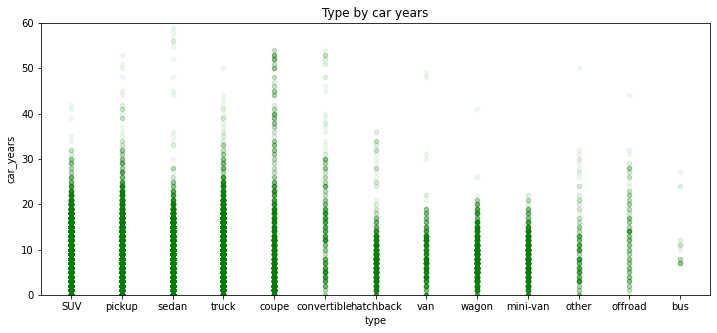

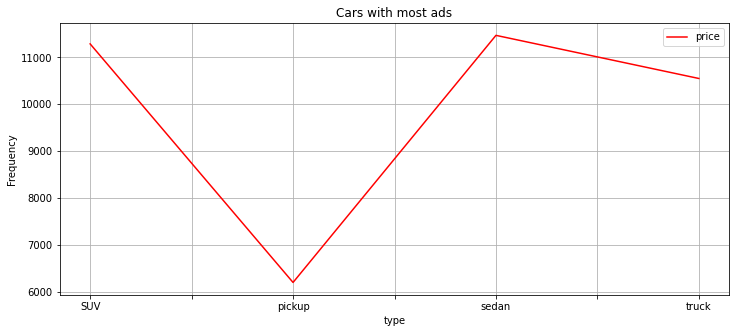

In [33]:
num_of_ads_by_car = data_filtered.plot(x='type', y='car_years', alpha= 0.06, kind='scatter', figsize= (12, 5), color='green')
plt.ylim(0, 60)
plt.title('Type by car years')
most_ads_type = (data_filtered
     .query('type in ("SUV", "sedan", "pickup", "truck")')
     .pivot_table(index='type', values= 'price', aggfunc='count')
     .plot(grid=True, figsize= (12, 5), color='red')
)
plt.ylabel('Frequency')
plt.title('Cars with most ads')

Podemos ver que los tipo de carros mas populares son los SUV y sedan al agrupar de tal manera.

## Factores de precio

Vamos a crear un bucle que nos ayude a hacer graficos segun algunos parametros:

Para las variables categoricas (transmission, paint_colot), vamos a hacer unos diagramas de caja y bigotes sobre los carros populares.

Para el resto de variables vamos a utilizar diagramas de dispersion que nos hara mas claro a vista los datos.

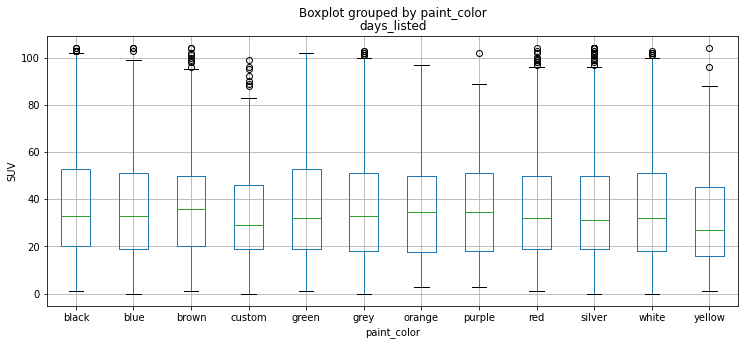

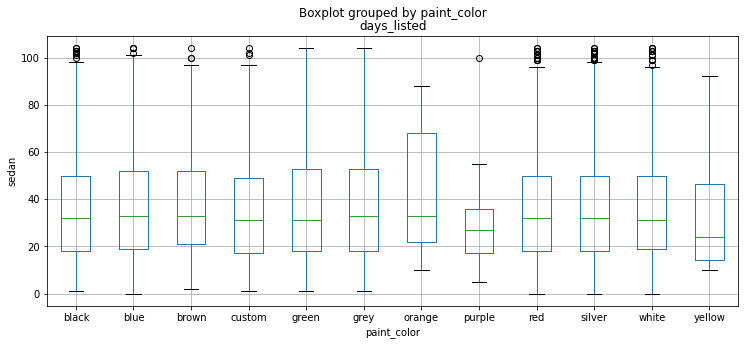

In [34]:
popular_type = data_filtered.query('type in ("sedan", "SUV")')

for car, cardata in popular_type.groupby('type'):
    cardata.boxplot(column='days_listed', by= 'paint_color', figsize=(12,5))
    plt.ylabel(car)

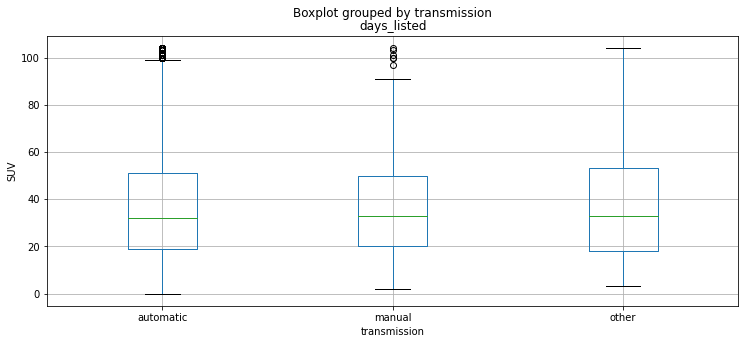

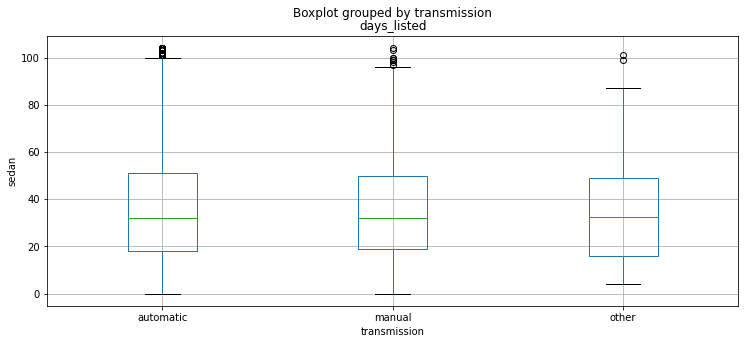

In [35]:
for car, cardata in popular_type.groupby('type'):
    cardata.boxplot(column='days_listed', by= 'transmission', figsize=(12,5))
    plt.ylabel(car)

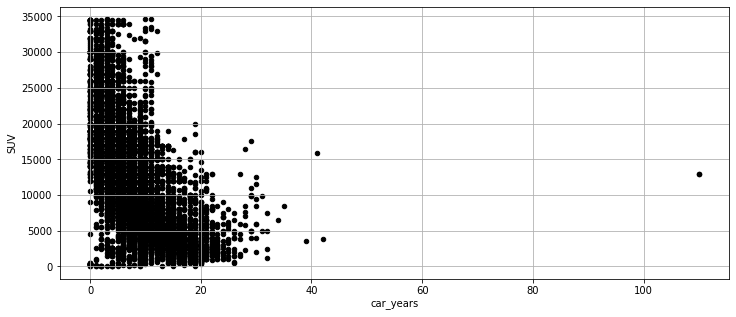

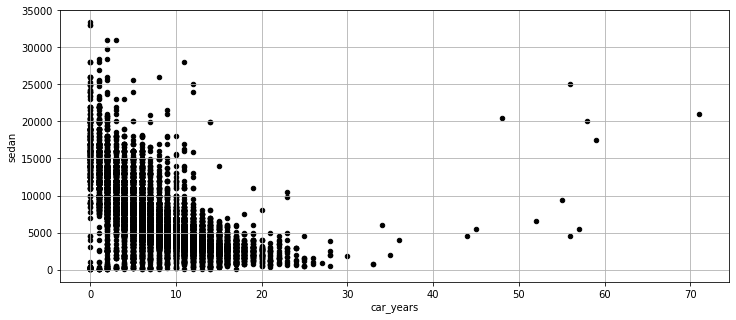

In [36]:
for car, cardata in popular_type.groupby('type'):
    cardata.plot(kind='scatter', x='car_years', y='price', color='black', grid=True, figsize=(12,5))
    plt.ylabel(car)

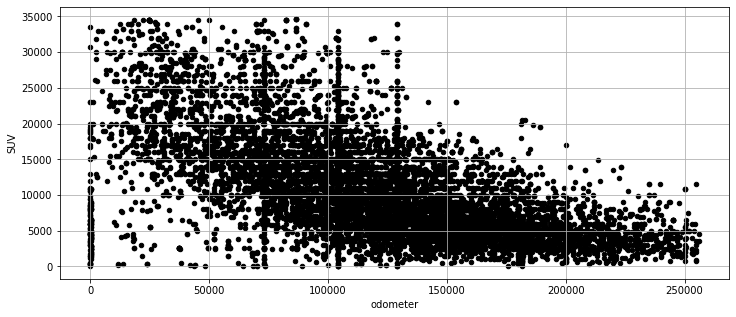

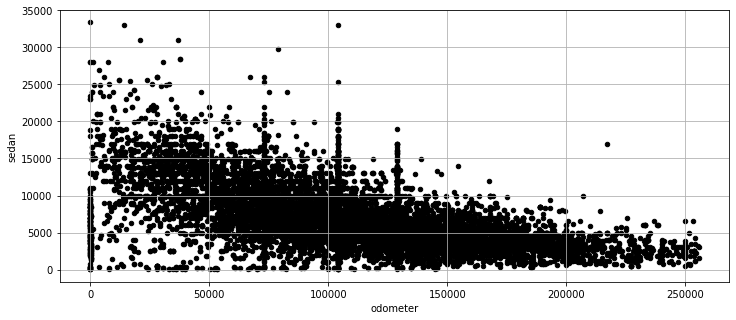

In [37]:
for car, cardata in popular_type.groupby('type'):
    cardata.plot(kind='scatter', x='odometer', y='price', color='black', grid=True, figsize=(12,5))
    plt.ylabel(car)

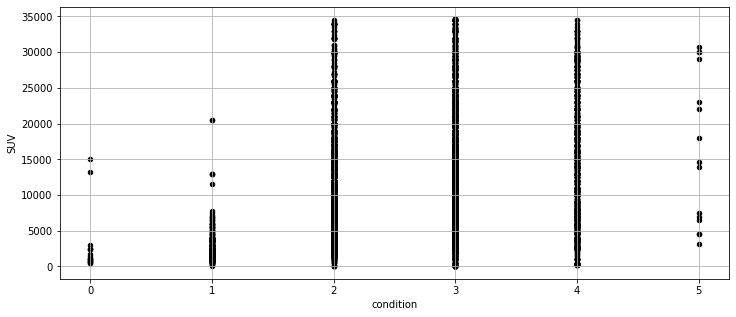

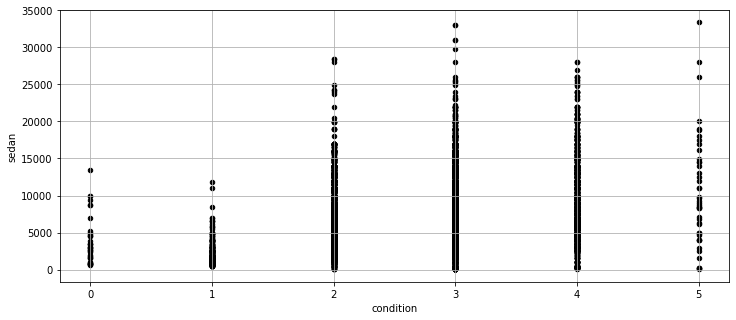

In [38]:
for car, cardata in popular_type.groupby('type'):
    cardata.plot(kind='scatter', x='condition', y='price', color='black', grid=True, figsize=(12,5))
    plt.ylabel(car)

## Conclusión general

Dentro de todo, hubieron ciertos datos que no estaban del todo claros ya que tenian valores ausentes que afectaban al resto de datos, pero tambien habian datos ausentes que no podian ser imputados porque eran variables independientes como es el color (paint_color). 

Al corregir todos los datos y hacer los arreglos, llegamos a la parte de hacer los graficos y se puede ver la diferencia de los datos que tienen valores atipicos a los que no. Los valores atipicos malogran la calidad de nuestro analisis entonces tuvimos que segmentar los datos en dos partes: Los que tienen datos atipicos y otro dataframe sin datos atipicos.

Para continuar, hicimos graficos que nos ayudaban a ver las correlaciones entre los datos. Vimos los periodos de colocacion de los anuncios, y luego intentamos determinar cuales podian ser los factores que hacian que estos duren mucho o poco. Llegamos a la conclusion que para poder determinar esto se necesitaban herramientas mas sofisticadas o que simplemente puede haber poca rotacion de los anuncios (Los viejos no resaltan y estan entre los ultimos, por lo que no son visibles para los visitantes).

Luego determinamos el precio promedio por cada tipo de los vehiculos, y gracias al grafico, seleccionamos los dos tipos de carros que son mas populares (SUV, sedan).

Para finalizar, usamos estos carros mas populares para sacar los factores de precio con los parametros indicados (edad, millaje, condición, tipo de transmisión y color). Usamos bucles para poder sacar la relacion de los parametros categoricos y mostralos con diagramas de caja y bigote (transmission, paint_color), y diagramas de dispersion para el resto de parametros.

Al sacar los factores logramos ver que mientras menos cantidad de millaje tiene el carro, mas sube el precio. En cambio, normalmente en los tipo de carro SUV, se venden mas los que tienen condicion de "bien", "excelente", "como nuevo" que los "nuevos" o "necesitan arreglos".

Para los tipo sedan se cumple la misma condicion que para los tipo SUV en ambas variables referente al precio, mientras menos millaje mas caro y los de condicion "bien", "excelente", "como nuevo" que los "nuevos" o "necesitan arreglos".

Basandonos en los resultados, los carros mas populares (SUV, sedan) si son de condicion "bien", "excelente", o "como nuevo", y tienen el millaje bajo, es muy probable a que se venda rapido.

<div class="alert alert-danger">
<h1> Comentarios del revisor </h1>

Muy buen proyecto en general, no olvides sacar conclusiones y observaciones del precio vs las otras variables para las dos categorías que analizaste. Con ello se podrán tomar decisiones al respecto del informe, por el momento hay solo descripciones de lo que se hizo y hace falta obtener los insights más importantes.

</div> 

<div class="alert alert-info">
<h1> Comentarios del estudiante</h1>
Listo! Agregado comentarios sobre precio vs las variables!
</div>

<div class="alert alert-success">
<h1> Comentarios del revisor V2</h1>

Muy buen trabajo! Me gustó mucho leerlo, muy limpio el código y cada paso que sigues. Felicitaciones!
</div>